# **Statistics**
## **Population(N)**
  Analysis of whole dataset. Appropriate for small dataset.

## **Sample(n)**
  Analysis of sample form whole dataset. Appropriate for large dataset.

## **Types of Statistics**
  1. Descriptive
  2. Inferential

### **Descriptive**: `use of Population(N) for analysis.`
  1. Measure of Centeral Tedency(mean,median and mode).
  2. Measure of Variability(Range,MAD,Variance and Standard Deviation)
  3. Measure of Shape(Skewness).
  4. Percentiles(Box plot).
  5. Frequency Distribution.
  6. Covariance and Correlation.
### **Inferential**: `use of Sample(n) for analysis.`
  1. Centeral Limit Theorem **.
  2. Hypothesis Testing.<br>
    1. Z-Test<br>
    2. T-Test<br>
    3. ChiSquare Testing.
  
  


# **Descriptive**: `use of Population(N) for analysis.`

## **1. Measure of Centeral Tedency(mean,median and mode).**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/titanic.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.Age.fillna(df.Age.mean(),inplace=True)

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

29.699117647058763


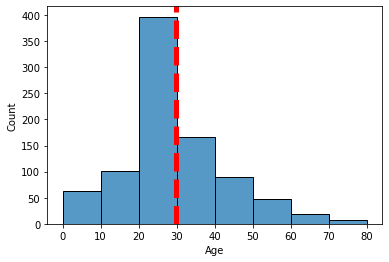

In [6]:
mean_age = df['Age'].mean()
print(mean_age)
sns.histplot(x='Age', data=df,bins=[i for i in range(0,81,10)])
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=5)
plt.show()

29.69911764705882


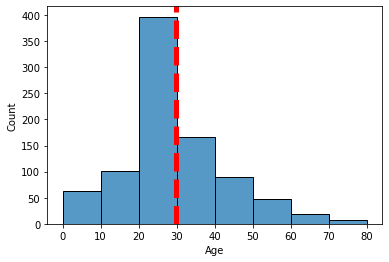

In [7]:
median_age = df['Age'].median()
print(median_age)
sns.histplot(x='Age', data=df,bins=[i for i in range(0,81,10)])
plt.axvline(median_age, color='red', linestyle='dashed', linewidth=5)
plt.show()

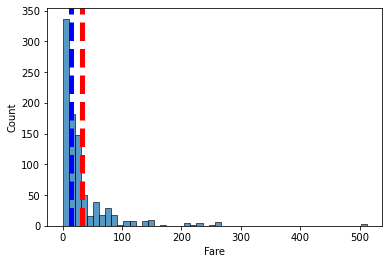

In [8]:
sns.histplot(x='Fare', data=df,bins=50)
plt.axvline(df['Fare'].mean(), color='red', linestyle='dashed', linewidth=5)
plt.axvline(df['Fare'].median(), color='blue', linestyle='dashed', linewidth=5)
plt.show()

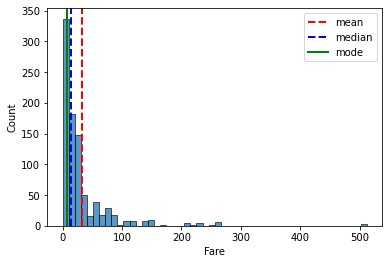

In [9]:
sns.histplot(x='Fare', data=df,bins=50)
plt.axvline(df['Fare'].mean(), color='red', linestyle='dashed',
 linewidth=2,label='mean')
plt.axvline(df['Fare'].median(), color='blue', linestyle='dashed',
 linewidth=2,label='median')
plt.axvline(df['Fare'].mode()[0], color='green',
 linewidth=2,label='mode')
plt.legend()
plt.show()

In [10]:
#mode is the value having highest frequency in list which is 8.0500
df['Fare'].value_counts()


8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
50.4958     1
13.8583     1
8.4583      1
7.7250      1
7.5208      1
Name: Fare, Length: 248, dtype: int64

## **2. Measure of Variability(Range,MAD,Variance and Standard Deviation)**

### **1. Range**
1. difference between maximum and minimum values

In [11]:
df = pd.read_csv('datasets/titanic.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [12]:
df.Age.min(),df.Age.max()

(0.42, 80.0)

In [13]:
Range = df.Age.max() - df.Age.min()
Range

79.58

### **2. Mean Absolute Deviation(MAD)**
The mean absolute deviation of a dataset is the average distance between each data point and the mean. It give us an idea about the variability in a dataset.

In [14]:
"""
Problem statement is we have to select only 1 section form
both section for future competition on the basis of marks but as
we can observe that both sections give us same mean so we will
use MAD for get better one. This help us to pick the group in
which spredness is less
"""
section_A = np.array([75, 65, 73, 68, 72, 67])
section_B = np.array([90, 47, 43, 96, 93, 51])
no = np.arange(1,len(section_A)+1)

In [15]:
mean = np.mean(section_A)

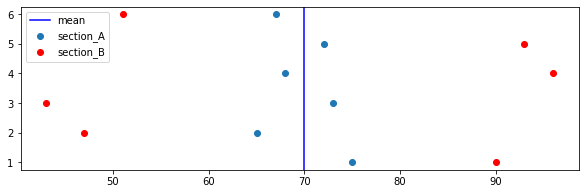

In [16]:
plt.figure(figsize=(10,3))
plt.scatter(section_A,no,label='section_A')
plt.scatter(section_B,no,color='red',label='section_B')
plt.axvline(mean,color='blue',label='mean')
plt.legend()
plt.show()

In [17]:
mad_a = sum(abs(section_A-mean))/len(section_A)
mad_b = sum(abs(section_B-mean))/len(section_B)
print('Section A MAD: ',mad_a,'\nSection B MAD: ', mad_b)

if mad_a<mad_b:
    print("we will select Section_A for competition!")
elif mad_a>mad_b:
    print("we will select Section_B for competition!")
else:
    print("""MAD is Fail Because both teams have same MAD now we will
    use Standard Deviation for team selection""")

Section A MAD:  3.3333333333333335 
Section B MAD:  23.0
we will select Section_A for competition!


### **3.Standard Deviation**
The standard deviation is a measure of the amount of variation or dispersion
of a set of values. A low standard deviation indicates that the values tend
to be close to the mean(also called the expected value) of the set, while a high standard deviation indicates that the values are spread out over a wider 
range.

### **4.Variance**
Variance is a measure of how data point differ from the mean. According to 
layman, a variance is a measure of how far a set of data(numbers) are 
spread out from their mean(average) value.

**(std)^2=variance**

In [18]:
section_A = np.array([75, 65, 73, 68, 72, 67])
section_B = np.array([90, 47, 43, 96, 93, 51])
no = np.arange(1,len(section_A)+1)

In [19]:
std_a, std_b = np.std(section_A), np.std(section_B)
std_a, std_b

(3.559026084010437, 23.18045153428495)

In [20]:
std_a, std_b = np.var(section_A), np.var(section_B)
std_a, std_b

(12.666666666666666, 537.3333333333334)

We will use any of the methods mentioned above to find the spread of the data. Then, we will choose the dataset with the smallest spread from these three methods (MAD, std or var).

In [21]:
dataset = pd.read_csv('datasets/titanic.csv')
dataset.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [22]:
dataset.Age.var() # too much variance

211.0191247463081

In [23]:
dataset.Age.std()

14.526497332334044

In [24]:
#best way to see stats use built-in method describe
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


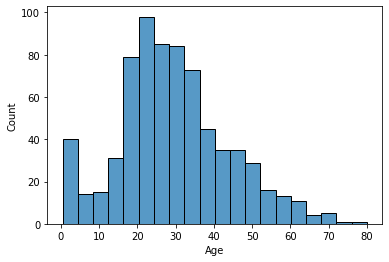

In [25]:
sns.histplot(x='Age',data=dataset)
plt.show()

## **4. Percentiles and Quartiles**

### **1.Percentiles**
**Percentiles** are used in statistics to give you a number that describes
the values that a given percent of the values are lower than.

difference between **Percentage** and **Percentiles**.
**Percentage**
suppose we took 400 marks in exams out of 500.

so, Percentage  = (400/500)*100 =>80%

**Percentiles**
suppose 100 students appear in exam from which our rank on the basis
of marks is 4th.
so, percentiles is ((no.students*your_rank)/no.students)*100
percentiles = ((100-4)/100)*100 => 96%

**Interquartile Range(IQR)**
1. We know that percentiles also ranges from 0% to 100%.
2. So for IQR we divide it into 4 equal parts 0-25-50-75-100.
3. Q1 is 25th Percentile, Q2 is 50th Percentile etc..
4. In ML we fetch data and data contains outlier
    1. data is [1,2,3,4,5,1000] so 1000 is outlier.
5. To find outlier we use **IQR**.Process is foloowing:
    1. find Q1(25 percentiles) and Q3(75 percentiles)
    2. **IQR = Q3-Q1.**
    3. find **minimum** using (Q1-1.5*IQR).
    4. find **maximum** using (Q3+1.5*IQR).
    5. any datapoint not lie in range of **minimum** and **maximum** is known as outliers.
    
**Q: Why don't we use percentage instead of percentiles to find outliers?**

When identifying outliers in a dataset, using percentiles is more effective and meaningful than using percentages for several reasons:

1. Lack of a Fixed Base Value
Percentages require a fixed base value to provide meaningful insights. For example, in the case of exam scores, where the total possible score is 100, calculating percentages is straightforward and intuitive. However, in many datasets, such as those involving ages, incomes, or other continuous variables, there isn't a natural or fixed maximum value to serve as a base. This makes percentages less useful because they need a reference point to be meaningful.

2. Distribution Considerations
Percentiles, on the other hand, are inherently distribution-based. They describe the relative standing of a value within the dataset, providing insights into the data's spread and central tendency. For instance, the 90th percentile indicates that a value is higher than 90% of the other values in the dataset, regardless of the actual range or maximum value.

3. Handling Skewed Data
Datasets often have skewed distributions with outliers that are much higher or lower than the rest of the data. Percentiles are more robust in handling these situations because they provide a rank-based approach, not influenced by the scale of the data. This is crucial for identifying outliers, as percentiles focus on the position of a value within the distribution rather than its absolute magnitude.

4. Relative Comparison
Percentiles allow for relative comparison across different datasets or different variables within the same dataset. This is particularly useful in statistical analyses and for making comparisons across diverse datasets. For example, comparing income levels across different regions or age groups is more effectively done using percentiles, as they provide a normalized measure of position.

5. Identifying Extremes
Using percentiles, you can easily identify extremes in the data. For instance, the top 1% or bottom 1% of values can be marked as outliers. This method is simple and consistent, as opposed to defining a fixed percentage cut-off, which might not adapt well to the data's actual distribution.

Conclusion
In summary, percentiles are preferred over percentages for identifying outliers because they:

Do not require a fixed base value.
Provide a rank-based, distribution-aware measure.
Are more robust to skewed data.
Facilitate relative comparisons.
Effectively highlight extreme values.
Using percentiles ensures a more accurate and meaningful identification of outliers in diverse datasets, accommodating the varying nature of data distributions and scales.


In [26]:
dataset = pd.read_csv('datasets/titanic.csv')
dataset.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [27]:
dataset.isnull().sum()['Age']

177

In [28]:
# as Age have 177 missing values. So , we can fill this using AGe column mean
dataset.Age.fillna(dataset.Age.mean(),inplace=True)

In [29]:
dataset.isnull().sum()['Age']

0

In [30]:
np.percentile(dataset.Age,25),np.percentile(dataset.Age,75)

(22.0, 35.0)

In [31]:
#minimum percentile or age
np.percentile(dataset.Age,0),dataset.Age.min()

(0.42, 0.42)

In [32]:
#maximum percentile or age
np.percentile(dataset.Age,100),dataset.Age.max()

(80.0, 80.0)

In [33]:
#median percentile or age
np.percentile(dataset.Age,50),dataset.Age.median()

(29.69911764705882, 29.69911764705882)

In [34]:
dataset.Age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [35]:
#by observing data we can see 75% of data is upto 35 years.
#0.42, 22.0, 29.7, 35.0, 80.0
#difference between 75% to 100% there is a lot of spreadness
# like 0.42 to 35 is 75% of data.
# 35 to 80 is only 25% larger gap in ages.

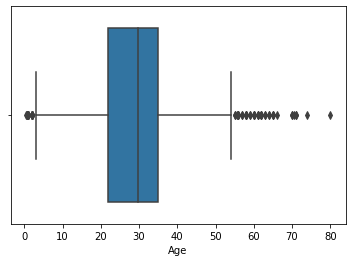

In [36]:
sns.boxplot(
    x="Age",
    data=dataset
);

# **3. Measure of Shape(Skewness)**

1. Skewness measures the asymmetery of the distribution.
2. A skewness valoes of 0 indicates a perfectly symmetrical distribution.
3. Positive skewness indicates that the distribution is skewed to the right
(i.e, the tail is longer on the right), while negative skewness indicates a
left skewness(i.e, the tail is longer on the left).

Skewness = sum(x_i - mean_x)^3/((N-1)std^3)

## we will use **Frequency & Cumulative distribution**

# **6.Frequency Ditribution**
A Frequency distribution is a table that shows the number of occurrences of
different values in a dataset.
### **Cumulative Ditribution**
A Cumulative distribution shows the accumulation of frequencies upto a certain point. It is obtained by adding up the frequencies as you move through the
values
| Value Range | Frequency Distribution | Cumulative Distribution |
|-------------|------------------------|-------------------------|
| 10-20       | 5                      | 5                       |
| 20-30       | 8                      | 13                      |
| 30-40       | 12                     | 25                      |
| 40-50       | 6                      | 31                      |

<br>
<img src='images/skewness.PNG' width=600>

1. -ve skewed: mean<median<mode.
2. no skewness: mean=median=mode.
3. +ve skewed: mode<median<mean.

In [37]:
dataset = pd.read_csv('datasets/titanic.csv')

In [38]:
dataset.Age.skew() # it is positive skewed means skewness>0

0.38910778230082704

(<AxesSubplot:xlabel='Age', ylabel='Count'>,)

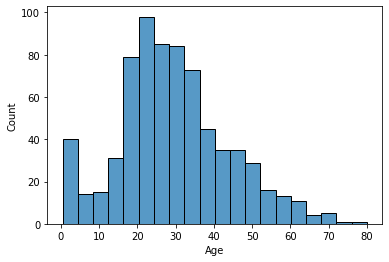

In [39]:
sns.histplot(
    x="Age",
    data=dataset
),

                x
count  100.000000
mean   -16.864275
std    103.345935
min   -270.677323
25%    -73.827929
50%    -25.304704
75%     54.700609
max    245.046495
skewness: -0.0467789570419041
-ve skewed, mode>median>mean, tail on left side, left skewed
mean: -16.864274595762176
median: -25.304704240213713
mode: -270.67732297270317


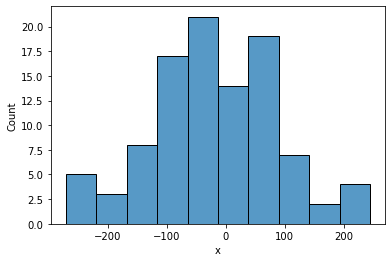

In [40]:
#examples
data = np.random.normal(0,100,100)
df = pd.DataFrame({'x':data})
print(df.describe())
print('skewness:',df.x.skew())
if df.x.skew()>0:
    print('+ve skewed, mode<median<mean, tail on right side, right skewed')
elif df.x.skew()<0:
    print('-ve skewed, mode>median>mean, tail on left side, left skewed')
else:
    print('no skewness, mode=median=mean')
print('mean:',df.x.mean())
print('median:',df.x.median())
print('mode:',df.x.mode()[0])
sns.histplot(x = 'x', data=df);

              x
count  36.00000
mean    7.00000
std     2.44949
min     2.00000
25%     5.00000
50%     7.00000
75%     9.00000
max    12.00000
mean: 7.0
median: 7.0
mode: 7
skewness: 0.0


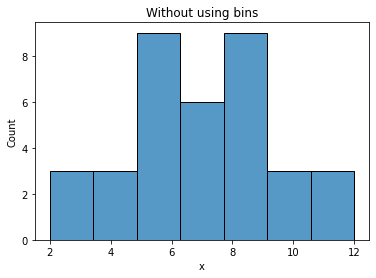

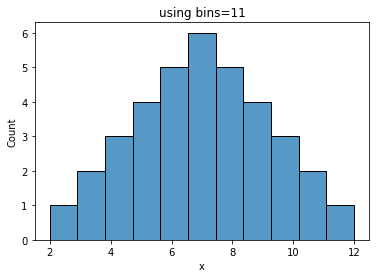

In [41]:
#examples
data = [2,
        3,3,
        4,4,4,
        5,5,5,5,
        6,6,6,6,6,
        7,7,7,7,7,7,
        8,8,8,8,8,
        9,9,9,9,
        10,10,10,
        11,11,
        12]
df = pd.DataFrame({'x':data})
print(df.describe())
print('mean:',df.x.mean())
print('median:',df.x.median())
print('mode:',df.x.mode()[0])
print('skewness:',df.x.skew())
plt.title('Without using bins')
sns.histplot(x = 'x', data=df);
plt.show();
plt.title(f'using bins={len(set(data))}')
sns.histplot(x = 'x', data=df,bins=len(set(data)));

# **some other patterns**
<img src='images/skewness1.PNG' width=600>

# **Random Variables**
A Random variable X is a function that assigns a real number to each 
outcome in the sample space of a random experiments.

# **Types:**
**1. Discrete Random Variable:** `A random variable that takes on a countable number of distinct values.` 

**2. Continuous Random Variable:** `A random variable that can take on any value within a given range or interval.`


# **Probability**
Probability measures the likelihood of a particular outcome or event occuring. It is typically expressed as a number between 0 and 1, where 0 indicates impossibility(event will not occur) and 1 indicates certainty(event will occur).

P(A) = Number of times A occurs / Total number of possible outcomes

In [42]:
def check_probability(ball,balls):
    print(f'probability of "{ball}" to occur:',
        frquencies[ball]/len(balls))
    print(f'probability of "{ball}" to occur in %:',
        (frquencies[ball]/len(balls))*100,'%')

#balls
balls = ['g','g','g','b','b','b','b']
#want to check the probablity of 'g' balls to occur
frquencies = {i:balls.count(i) for i in set(balls)}
print(frquencies)
check_probability(ball='g',balls=balls)
check_probability(ball='b',balls=balls)
    

{'b': 4, 'g': 3}
probability of "g" to occur: 0.42857142857142855
probability of "g" to occur in %: 42.857142857142854 %
probability of "b" to occur: 0.5714285714285714
probability of "b" to occur in %: 57.14285714285714 %


# **Probability Distribution**
Probability distributions describe how the probabbility of a different outcomes
are distributed over the sample space of a random variable.

1. Discrete Probability Distribution.
2. Continuous Probability Distribution. 

<img src="images/types_of_probability_function.PNG" width=600>

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dictionary with the probabilities of each outcome
poss = {
    2: 1/36,
    3: 2/36,
    4: 3/36,
    5: 4/36,
    6: 5/36,
    7: 6/36,
    8: 5/36,
    9: 4/36,
    10: 3/36,
    11: 2/36,
    12: 1/36,
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame([{'outcomes': k, 'possibility': v*100} for k, v in poss.items()])
df


,outcomes,possibility
0,2,2.777778
1,3,5.555556
2,4,8.333333
3,5,11.111111
4,6,13.888889
5,7,16.666667
6,8,13.888889
7,9,11.111111
8,10,8.333333
9,11,5.555556


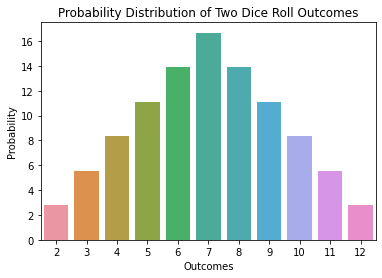

In [44]:
# Plot the data using seaborn
sns.barplot(x='outcomes', y='possibility', data=df)

# Show the plot
plt.xlabel('Outcomes')
plt.ylabel('Probability')
plt.title('Probability Distribution of Two Dice Roll Outcomes')
plt.show()

<img src="images/probability_distributions.png" width=600>

# **Probability Distribution Functions(PDF, PMF & CDF)**
A probability distribution is the mathematical function that gives the probabilities of occurrence of different possible outcomes for an experiment.

This is used when we have a large amount of data that cannot be analyzed by a simple probability distribution; instead, we use a probability function.

#### **1. Probability Density Function(PDF):**
1. Used for `Continuous nature Data`.

#### **2. Probability Mass Function(PMF):**
1. Used for `Discrete nature Data`.

#### **3. Cumulative Density Function(CDF):**
1. It is simple used for cumulative sum



# **Normal Distribution Functions**
It known as the Gaussian distribution, is a probability distribution that is 
symmetric about the mean, showing that data near the mean are more frequent in
occurrence than data far from the mean. In graph from, normal distribution will
appear as a bell curve.

# **Standard Normal Distribution**
1. The standard normal distribution, also known as Z distribution or Z-score, is a special case of the normal distribution.
2. mean of 0 and standard deviation of 1.

# **6. Covariance and Correlation**
## **What is Covariance?**
1. Covariance signifies the direction of the linear relationship between the two variables. By direction we mean if the variables are directly proportional or inversely proportional to each other.
2. (Increasing the value of one variable might have a positive or negative impact on the value of the other variable).

Cov(x,y)=(∑(x_i-x_mean)*(y_i-y_mean))/N

1. we have 2 columns `x` and `y`.
2. increase in `x` increase `y` -> +ve covariance
3. decrease in `x` increase `y` -> -ve covariance
4. increase in `x` decrease `y` -> No covariance
5. -inf to +inf.
6. If dataset is large than dificult to findout covariance then we will use correlation.

## **What is Correlation?**
Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two, numerically measured, continuous variable.

correlation = Cov(x,y)/(std_x*std_y)

`This formula will convert Covariance value from (-inf to +inf) to (-1 to 1)`

1. Divide -1 to 1 into [-1,-0.5,0,0.5,1]
2. 0 to 0.5 is weak +ve correlation.
3. 0.5 to 1 is strong +ve correlation.
4. -0.5 to 0 is weak -ve correlation.
5. -1 to -0.5 is strong -ve correlation.



In [45]:
dataset = pd.read_csv('datasets/tips.csv')
dataset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [46]:
dataset.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [48]:
#correlation
data_corr = dataset.select_dtypes(['float64','int64']).corr()
data_corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [49]:
#covariance
data_cov = dataset.select_dtypes(['float64','int64']).cov()
data_cov

,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


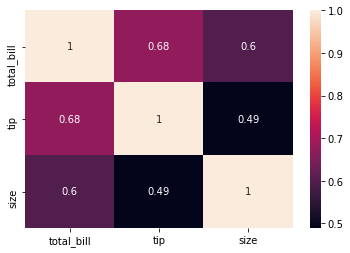

In [50]:
sns.heatmap(data=data_corr,annot=True);

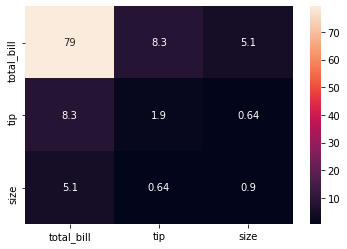

In [51]:
sns.heatmap(data=data_cov,annot=True);

# **2nd Type of Statistics: Inferential**: 
`use of Sample(n) for analysis.`
# **Types:**
# **1. Centeral Limit Theorem**.
The Centeral Limit Theorem(CLT) states that when plotting a sample distribution of means the sample will be equal to the population mean and the sample distribution will approach normal distribution with variance equal to the standard error.

1. The sample data must be sampled and selected randomly from population.
2. There should not be any multicolinearity in the sampled data which is one sample should not influence the other samples.
3. The sample size should be no more than 10% of the population, Generally, sample size greater than 30 (n>30) is considered good.

In [57]:
pop_data = np.random.randint(10,100,10000)
pop_table = pd.DataFrame({"pop_data":pop_data})
pop_table

,pop_data
0,66
1,95
2,76
3,24
4,53
...,...
9995,36
9996,59
9997,22
9998,18


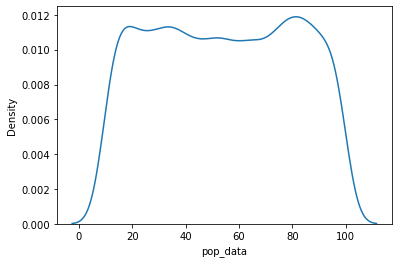

In [59]:
sns.kdeplot(x='pop_data',data=pop_table);

In [80]:
#CLT indicates that all samples mean from population give us normal distribution
samp_mean = []
for no_samp in range(100):
    samp_mean.append(
        pop_table.sample(500,random_state=no_samp).mean()[0]
    )

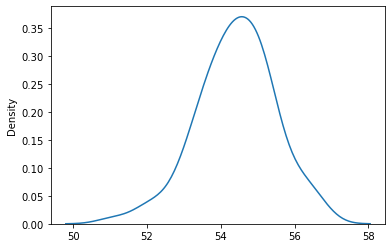

In [81]:
sns.kdeplot(data=samp_mean);

In [82]:
np.array(samp_mean).mean()

54.40920000000001

In [83]:
pop_data.mean()

54.4125

1. taking mean of all sample_means almost equal to population mean.
2. It is useful when we are unable to take mean of population then alternatively we take few samples and their means and then take mean of all samples calculated means gives us almot population mean.
3. e.g, ([sample1_mean, sample2_mean,...,sample50_mean]).mean().
4. make sure sample count should be gretaer than 30 values and should be less than 10% of population.

# **2. Hypothesis Testing**
It is a part of statistical analysis, where we test the assumptions made regarding a population parameter. It is generally used when we were to compare a single group with an external standard and two or more groups with each other.

## **Terminology used in Hypothesis Testing:**
### **1. Null Hypothesis:**
Null hyposthesis is a statistical theory that suggests there is no statistical significance exists between the populations, It is denoted bu H0 and read as H-naught.

It said medicine_A==Medicine_B or minor >= or <=.

### **2. Alternative Hypothesis:**
An Alternative hypothesis suggests there is a single difference between the population parameters. It could be greater or smaller. Basically, It is the contrast of the Null Hypothesis. It is denoted by Ha or H1.
